In [3]:
import pandas as pd
file_path='C:/Users/admin/Downloads/reddit_stock_data_final.json'
data=pd.read_json(file_path)
data

,post_id,post_text,post_date,user_handle,sentiment,sentiment_score,mention_count,stock_symbol,stock_price,price_change
0,qfmugy,TSLA hits $1000. Makes it a first $1T Auto com...,2021-10-25 18:16:12,daynightcase,Positive,0.284375,3,TSLA,339.476654,-0.627405
1,vxi1zm,Was the TWTR bid by Elon just a way to hide a ...,2022-07-12 18:28:34,phatelectribe,Positive,0.024511,2,TSLA,237.039993,1.703345
2,qowk4z,The absurdity of Elon Musk's poll to decide to...,2021-11-07 20:03:49,vytasmike,Positive,0.025000,2,TSLA,387.646667,-4.840071
3,h0ehgw,"Every day I don't buy TSLA, is a day I wish I ...",2020-06-10 16:37:29,Estate4reaL,Positive,0.500000,2,TSLA,64.856003,-5.09341
4,pjng0j,"Elon Musk says Tesla (TSLA) is worth $3,000 a ...",2021-09-07 13:50:26,rugerapatt,Positive,0.199210,4,TSLA,250.973328,2.637784
...,...,...,...,...,...,...,...,...,...,...
1695,w5kbvd,Keep or Trade Inherited Stocks My husband and ...,2022-07-22 20:20:38,EColli93,Positive,0.320000,1,PG,135.132080,1.59837
1696,y9jbmq,Will rates have to rise to equal the rate of i...,2022-10-21 04:06:55,AmericanSahara,Positive,0.060000,1,PG,122.350670,1.252074
1697,u1qljf,Recession stocks with opportunity for scale? I...,2022-04-12 04:36:48,r2002,Positive,0.057177,0,PG,148.438339,-0.300981
1698,pihj57,If you like to swing-trade here's a list of st...,2021-09-05 17:39:36,LegendaryHODLer,Positive,0.208333,1,PG,132.428406,-0.374896


In [11]:
# Drop rows where any of the important columns are missing

In [13]:
data = data.dropna(subset=['stock_symbol', 'post_date', 'stock_price'])

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df=pd.read_json(file_path)
# Assuming df is your dataframe
# Ensure 'post_date' is in datetime format
df['post_date'] = pd.to_datetime(df['post_date'], errors='coerce')

# Drop rows where any of the important columns are missing
df = df.dropna(subset=['stock_symbol', 'post_date', 'stock_price'])

# Convert 'post_date' to numeric (days since the first date)
df['days_since'] = (df['post_date'] - df['post_date'].min()).dt.days

# Convert 'stock_symbol' to numeric using Label Encoding
label_encoder = LabelEncoder()
df['stock_symbol_encoded'] = label_encoder.fit_transform(df['stock_symbol'])

# Define independent variables (X) and dependent variable (y)
X = df[['days_since', 'stock_symbol_encoded']]  # Independent variables
y = df['stock_price']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the regression coefficients and intercept
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict the stock prices on the test data
y_pred = model.predict(X_test)

# Print predictions
print("\nPredictions on Test Data:")
print(y_pred)


Regression Coefficients: [0.0278079  5.02994748]
Intercept: -3.0723126858724754

Predictions on Test Data:
[ 89.81090863 109.16038021 134.43776322 107.06493914 205.02059253
 140.95118608 174.51532392 126.41923901 145.0586445  140.35099796
 153.66596294 173.50612835 108.87901838 144.19988234 118.27808929
 132.85754108 129.45686594 194.98193987 155.28210407 129.1279994
 201.43337315 182.1379719  106.47769039 175.99242553 132.12797002
 156.18508815 113.28734361 146.55370561 186.31572282 133.48572894
 142.93867834 148.44792576 180.01317745 189.09979583 158.27724641
 118.68207662 137.18746272 203.82156993 140.35910905 212.13613266
 164.46527737 177.84416108 138.11651738 158.77450584 122.87778703
 132.15577793 126.09693807 165.58415906 166.0847013  141.51062692
 200.90830582 120.51411535 199.3232554  146.74681544 194.39797392
  76.71338674 207.16180099 100.49725412 151.78159121 152.69925198
 151.06186855 168.68551288 101.83203342 136.10295454 184.71754119
 168.92110731 153.63815504 131.45246

C:\Users\admin\AppData\Local\Temp\ipykernel_2000\3660844200.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.96400404 0.99352882 0.70050556 0.91466127 0.95429727 0.86248736
 0.89565217 0.93731041 0.83680485 0.68715875 0.9338726  0.97087968
 0.77836198 0.97067745 0.82264914 0.81617796 0.89929221 0.78645096
 0.64186047 0.90839232 0.8958544  0.92719919 0.85257836 0.77815976
 0.70394338 0.67785642 0.73023256 0.8364004  0.97067745 0.96299292
 0.88998989 0.77654196 0.81011122 0.81921132 0.78402427 1.
 0.80728008 0.79716886 0.68837209 0.70293225 0.8471183  0.88169869
 0.89241658 0.72800809 0.73346815 0.96723964 0.790091   0.81799798
 0.7627907  0.59029323 0.74034378 0.86127401 0.98907988 0.88877654
 0.97371082 0.90677452 0.80889788 0.96885743 0.80283114 0.76784631
 0.85116279 0.69565217 0.81456016 0.97209302 0.81779575 0.99858443
 0.85075834 0.79110212 0.76683519 0.79110212 0.80343782 0.97654196
 0.84994944 0.93447

Optimized Parameters (theta): [74.45149501 63.02978576]

Actual y values (Test Data):
[170.20195007 167.04074097 160.74476624 189.55180359 118.09573364
 112.30846405 136.93995667 182.40705872 192.23822021 182.0811615
  70.23899841 171.95661926   0.96       141.19006348 170.23403931
 170.75215149 157.11630249 129.79501343 147.38708496 146.03128052]

Predicted y values (Test Data):
[124.13604605 130.47089004 125.09200842 135.41640204 120.68183534
 118.75716443 128.18932651 130.9934828  133.31328482 135.2124634
 114.90782261 130.54736703 133.35152332 126.08620929 134.63888598
 134.60064749 124.59490799 126.40486341 123.51148396 123.39676848]

Final Cost (MSE) after Gradient Descent: 2038.633080056612


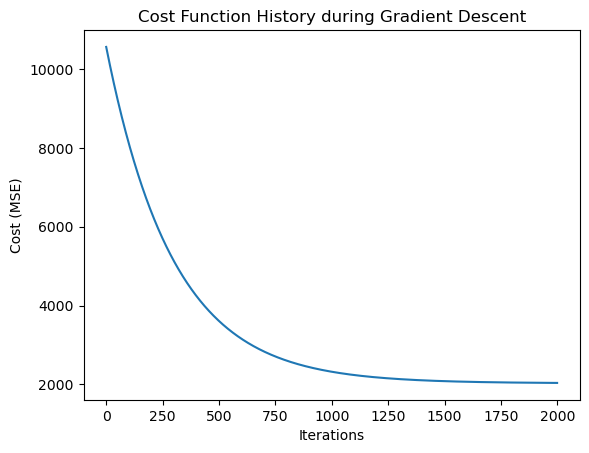

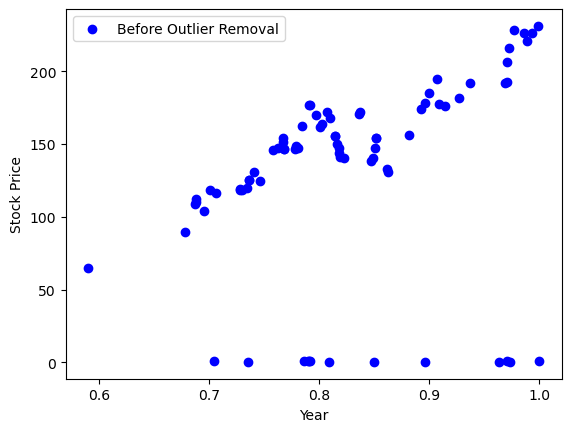

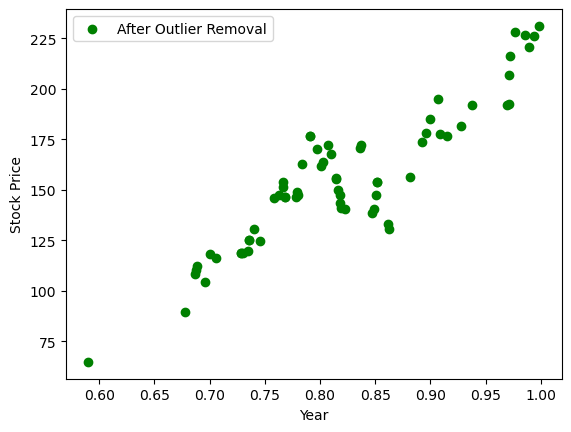

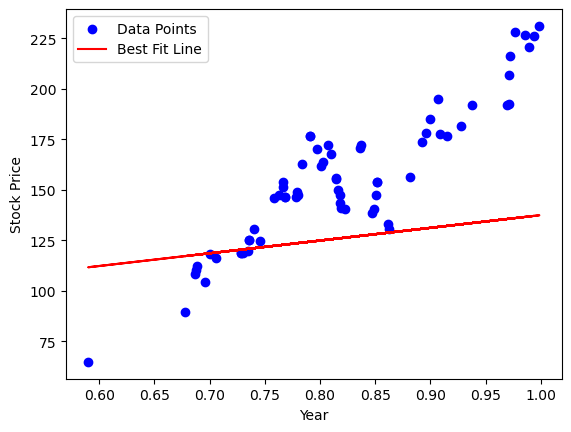

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your dataframe (you would replace this with your actual dataframe)
# Sample DataFrame (you would replace this with your actual dataframe)
# df = pd.read_csv("your_data.csv")  # Example of reading the data

# Ensure 'post_date' is in datetime format
df['post_date'] = pd.to_datetime(df['post_date'], errors='coerce')

# Drop rows where any of the important columns are missing
df = df.dropna(subset=['stock_symbol', 'post_date', 'stock_price'])

# Filter data for a single stock symbol (replace 'AAPL' with your stock symbol)
df_single_symbol = df[df['stock_symbol'] == 'AAPL']  # Example: 'AAPL'


# Normalize days_since to a smaller scale (e.g., divide by the max days_since value)
df_single_symbol.loc[:, 'days_since'] = df_single_symbol['days_since'] / df_single_symbol['days_since'].max()

# Explicitly cast 'days_since' to float to prevent dtype compatibility issues
df_single_symbol['days_since'] = df_single_symbol['days_since'].astype(float)


# Define independent variables (X) and dependent variable (y) for the filtered stock symbol
X = df_single_symbol[['days_since']].values  # Independent variable (days_since)
y = df_single_symbol['stock_price'].values  # Dependent variable (stock_price)

# Add bias term (intercept) by adding a column of ones to the feature matrix
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X for bias term

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Descent Parameters
learning_rate = 0.001  # Lower the learning rate
iterations = 2000

# Initialize parameters (theta) with small random values instead of zeros
theta = np.random.randn(X_train.shape[1])

# Cost function: Mean Squared Error
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

# Perform gradient descent to optimize theta (weights)
theta_opt, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Print optimized parameters (theta)
print("Optimized Parameters (theta):", theta_opt)

# Predict using the optimized theta values
y_pred = X_test.dot(theta_opt)

# Print actual vs predicted values for the test data
print("\nActual y values (Test Data):")
print(y_test)

print("\nPredicted y values (Test Data):")
print(y_pred)

# Final cost after gradient descent
final_cost = compute_cost(X_train, y_train, theta_opt)
print(f"\nFinal Cost (MSE) after Gradient Descent: {final_cost}")

# Plotting Cost History during Gradient Descent
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function History during Gradient Descent')
plt.show()

# IQR (Interquartile Range) to remove outliers
def remove_outliers_with_iqr(X, y):
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (y >= lower_bound) & (y <= upper_bound)
    return X[mask], y[mask]

# Apply outlier removal
X_train_no_outliers, y_train_no_outliers = remove_outliers_with_iqr(X_train, y_train)

# Before removing outliers
plt.scatter(X_train[:, 1], y_train, color="blue", label="Before Outlier Removal")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# After removing outliers
plt.scatter(X_train_no_outliers[:, 1], y_train_no_outliers, color="green", label="After Outlier Removal")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Function to plot the best fit line
def plot_best_fit_line(X, y, theta_opt, xlabel="X", ylabel="Y"):
    plt.scatter(X[:, 1], y, color="blue", label="Data Points")
    plt.plot(X[:, 1], X.dot(theta_opt), color="red", label="Best Fit Line")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot the best fit line after outlier removal
plot_best_fit_line(X_train_no_outliers, y_train_no_outliers, theta_opt, xlabel="Year", ylabel="Stock Price")


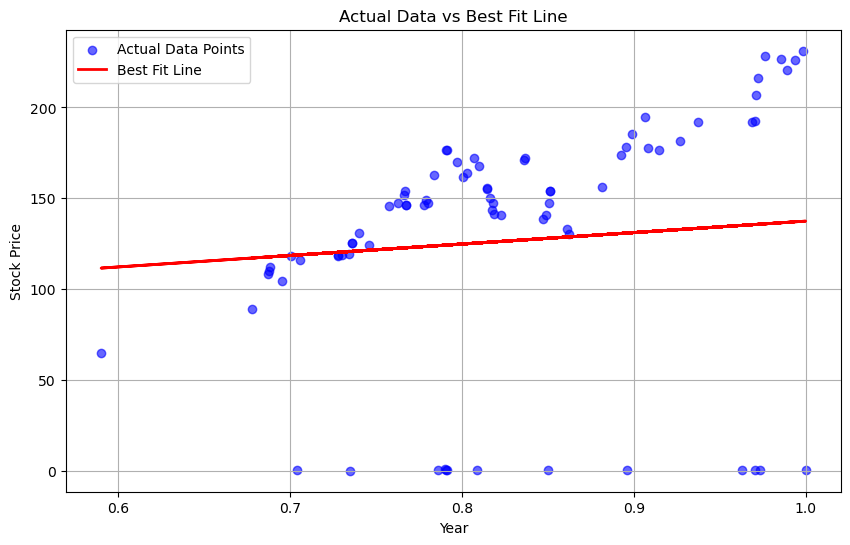

In [44]:
import matplotlib.pyplot as plt

# Visualize the original data and the best fit line
def plot_best_fit_line(X, y, theta, xlabel="Year", ylabel="Stock Price"):
    """
    Plots the original data points and the best-fit line obtained from the model.
    """
    # Extract the independent variable (year) from X
    year = X[:, 1]  # Second column of X contains the years (since the first column is bias term)

    # Calculate predicted stock prices using the optimized theta
    predicted_prices = X.dot(theta)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(year, y, color="blue", label="Actual Data Points", alpha=0.6)
    plt.plot(year, predicted_prices, color="red", label="Best Fit Line", linewidth=2)

    # Labeling the axes
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Actual Data vs Best Fit Line")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_best_fit_line(X_train, y_train, theta_opt, xlabel="Year", ylabel="Stock Price")


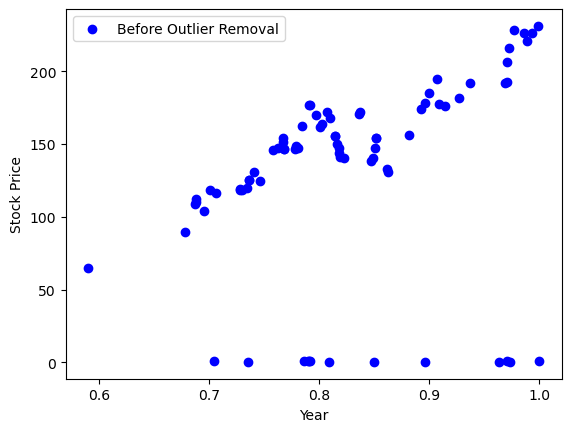

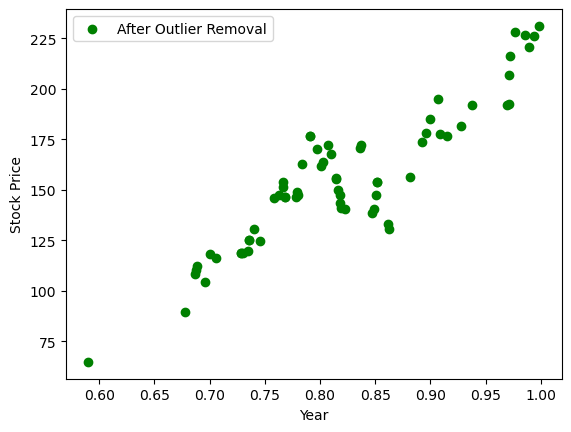

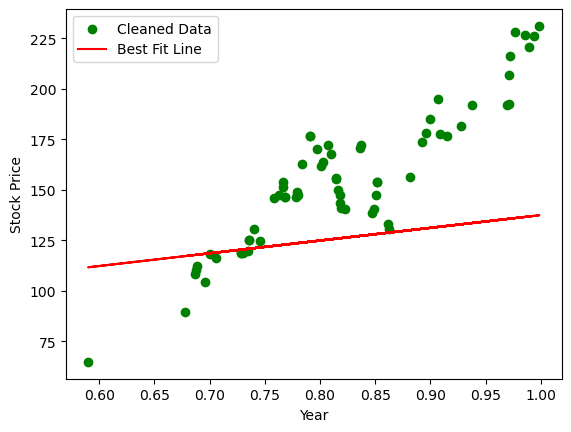

In [46]:
import numpy as np
import matplotlib.pyplot as plt
# Function to remove outliers using IQR
def remove_outliers_with_iqr(X, y):
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (y >= lower_bound) & (y <= upper_bound)
    return X[mask], y[mask]

# Function to plot the best-fit line
def plot_best_fit_line(X, y, theta_opt, xlabel="Year", ylabel="Stock Price"):
    plt.scatter(X[:, 1], y, color="green", label="Cleaned Data")
    plt.plot(X[:, 1], X.dot(theta_opt), color="red", label="Best Fit Line")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# 1. Initial Plot (Before Outlier Removal)
plt.scatter(X_train[:, 1], y_train, color="blue", label="Before Outlier Removal")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# 2. Remove Outliers using IQR
X_train_no_outliers, y_train_no_outliers = remove_outliers_with_iqr(X_train, y_train)

# 3. Plot After Outlier Removal
plt.scatter(X_train_no_outliers[:, 1], y_train_no_outliers, color="green", label="After Outlier Removal")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# 4. Plot Best Fit Line after removing outliers
plot_best_fit_line(X_train_no_outliers, y_train_no_outliers, theta_opt, xlabel="Year", ylabel="Stock Price")